# Índice de Calidad del aire

In [2]:
import pandas as pd
import os

In [4]:
#data_2024 = pd.read_csv(r"./Original_dataset/imeca2024.csv")
carpeta = r"./Original_dataset"

dataframes = []

for archivo in os.listdir(carpeta):
    df = pd.read_csv(carpeta + "/" + archivo)
    columnas_primarias = ["Fecha","Hora"]
    zonas = ["Noroeste", "Noreste", "Centro", "Suroeste", "Sureste"]
    for zona in zonas:
        columnas_primarias.append(f"{zona} PM10")
        columnas_primarias.append(f"{zona} monóxido de carbono")
    df_interes = df[columnas_primarias]

    dataframes.append(df_interes)

df_comb = pd.concat(dataframes, ignore_index=True)

In [5]:
df_comb

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
0,01/01/2016,1,108,13.0,117,16.0,107,16.0,67,9.0,107.0,11.0
1,01/01/2016,2,110,13.0,122,18.0,107,17.0,70,9.0,107.0,12.0
2,01/01/2016,3,113,14.0,124,19.0,109,18.0,76,10.0,108.0,13.0
3,01/01/2016,4,115,14.0,126,19.0,110,19.0,83,10.0,107.0,14.0
4,01/01/2016,5,116,15.0,127,20.0,112,17.0,90,11.0,108.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69318,29/06/2024,13,39,8.0,39,7.0,35,8.0,23,7.0,26.0,6.0
69319,29/06/2024,14,39,8.0,39,7.0,35,8.0,23,7.0,28.0,6.0
69320,29/06/2024,15,39,7.0,39,6.0,35,7.0,23,6.0,28.0,6.0
69321,29/06/2024,16,36,6.0,39,6.0,35,7.0,24,6.0,28.0,5.0


In [7]:
df = pd.read_csv('Combinado.csv')

In [8]:
df.describe()
#Recordemos que el -99 es la codificación para un valor nulo, por ello le vamos a decir que no los lea

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69313.000000,69264.000000
mean,12.499834,67.921296,1.977954,74.721031,3.127483,58.138078,2.607762,41.921931,0.597598,57.901663,1.633302
std,6.921911,25.043909,20.276814,31.815297,20.304285,23.530954,19.524339,19.556672,19.885728,40.724041,20.484189
min,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,7.000000,48.000000,4.000000,51.000000,4.000000,40.000000,4.000000,30.000000,3.000000,40.000000,4.000000
50%,12.000000,65.000000,5.000000,77.000000,5.000000,55.000000,5.000000,40.000000,4.000000,60.000000,5.000000
75%,18.000000,88.000000,7.000000,102.000000,8.000000,74.000000,8.000000,52.000000,5.000000,84.000000,7.000000
max,24.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [9]:
import numpy as np
df.replace(-99, np.nan, inplace = True ) # Reemplaza los -99 con NA
#Puede ocurrir que en algún momento en alguna celda se nos ponga un valor de letras, por lo taqnto para resolver eso hacemos:

for col in df.columns[1:]: #Aquí le digo que me filtre
    df[col] = pd.to_numeric(df[col ], errors='coerce')

df ['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y') #Aquí le digo cómo leer el formato de la fecha para que lo lea

In [10]:
df ['Fecha'] = df ['Fecha'].dt.strftime('%Y-%m-%d') #Así le indicamos a python el formato que queremos

In [11]:
df.head()

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
0,2016-01-01,1,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
1,2016-01-01,2,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2,2016-01-01,3,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
3,2016-01-01,4,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
4,2016-01-01,5,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0


In [12]:
#Me doy cuenta que aquí pandas me asigna la fecha y la hora, pero me repite la fecha, por lo tanto le vamos a agregar la hora a la fecha para que sea una etiqueta única
#Lo hago así
df['Hora' ] -= 1
df['Fecha_Hora' ] = pd.to_datetime(df['Fecha' ] + " " +df['Hora' ].astype(str) + ':00:00') #Me marca error de que no soporta el formato de hora, arriba muestro cómo resolverlo
#Me marcó error y tuve que convertir el formato como se muestra líneas arriba para que pudiera correr

In [13]:
#Ahora le vamos a indicar
df.set_index('Fecha_Hora', inplace=True) #Aquí le digo a Pandas que la fecha y hora combinada será el formato de ordenamiento

In [14]:
df.head()

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
Fecha_Hora,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
2016-01-01 01:00:00,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2016-01-01 02:00:00,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
2016-01-01 03:00:00,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
2016-01-01 04:00:00,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0


In [15]:
#Aquí le digo que me ordene de menor a mayor, si yo quisiera que fuera al revés mayor a menor lo hago así:
#df.sort_index(inplace=True, ascending = True)
df.sort_index(inplace=True)

In [16]:
#Vamos a ponerle formato más entendible a nuestras columnas
short_name = {
    'Noroeste PM10' : 'NO-PM10',
    'Noroeste monóxido de carbono' : 'NO-CO',
    'Noreste PM10' : 'NE-PM10',
    'Noreste monóxido de carbono' : 'NE-CO',
    'Centro PM10' : 'CE-PM10',
    'Centro monóxido de carbono' : 'CE-CO',
    'Suroeste PM10' : 'SO-PM10',
    'Suroeste monóxido de carbono' : 'SO-CO',
    'Sureste PM10' : 'SE-PM10',
    'Sureste monóxido de carbono' : 'SE-CO'
}
df.rename(columns = short_name, inplace = True)

In [17]:
#Traemos la librería matl
import matplotlib.pyplot as plt

In [18]:
#Para ver si hay datos nulos
df.isnull().sum()

Fecha         0
Hora          0
NO-PM10      75
NO-CO      2678
NE-PM10     425
NE-CO      2595
CE-PM10      24
CE-CO      2454
SO-PM10     288
SO-CO      2686
SE-PM10    2674
SE-CO      2759
dtype: int64

In [19]:
#Hago esto para visualizar los datos nulos que tengo
nulos_por_año = df.isnull().groupby(df.index.year).sum()
nulos_por_año

,Fecha,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO
Fecha_Hora,,,,,,,,,,,,
2016,0,0,0,366,0,366,0,366,0,366,31,366
2017,0,0,2,370,67,363,0,367,46,362,883,369
2018,0,0,0,364,179,364,0,364,0,364,719,370
2019,0,0,47,316,21,307,0,307,36,307,314,301
2020,0,0,26,374,43,373,5,375,22,379,321,375
2021,0,0,0,343,76,271,0,253,107,297,120,353
2022,0,0,0,318,39,330,0,291,48,348,201,368
2023,0,0,0,168,0,162,19,72,29,204,75,198
2024,0,0,0,59,0,59,0,59,0,59,10,59


In [20]:
#Así los agrupo para que me dé por año y los nulos por mes
nulos_por_mes = df.isnull().groupby([ df.index.year,df.index.month ]).sum()

In [21]:
#nulos_por_mes #Así me muestra todo, pero puedo ver por etiqueta
nulos_por_mes.loc[2024]

,Fecha,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO
Fecha_Hora,,,,,,,,,,,,
1,0,0,0,31,0,31,0,31,0,31,0,31
2,0,0,0,28,0,28,0,28,0,28,0,28
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Arriba me dice cuántos tengo, pero no me dice en qué rango de fechas está, para ello instalamos la librería missingno #-como pokemon
#%pip install missingno

In [23]:
import missingno as msno

<Axes: >

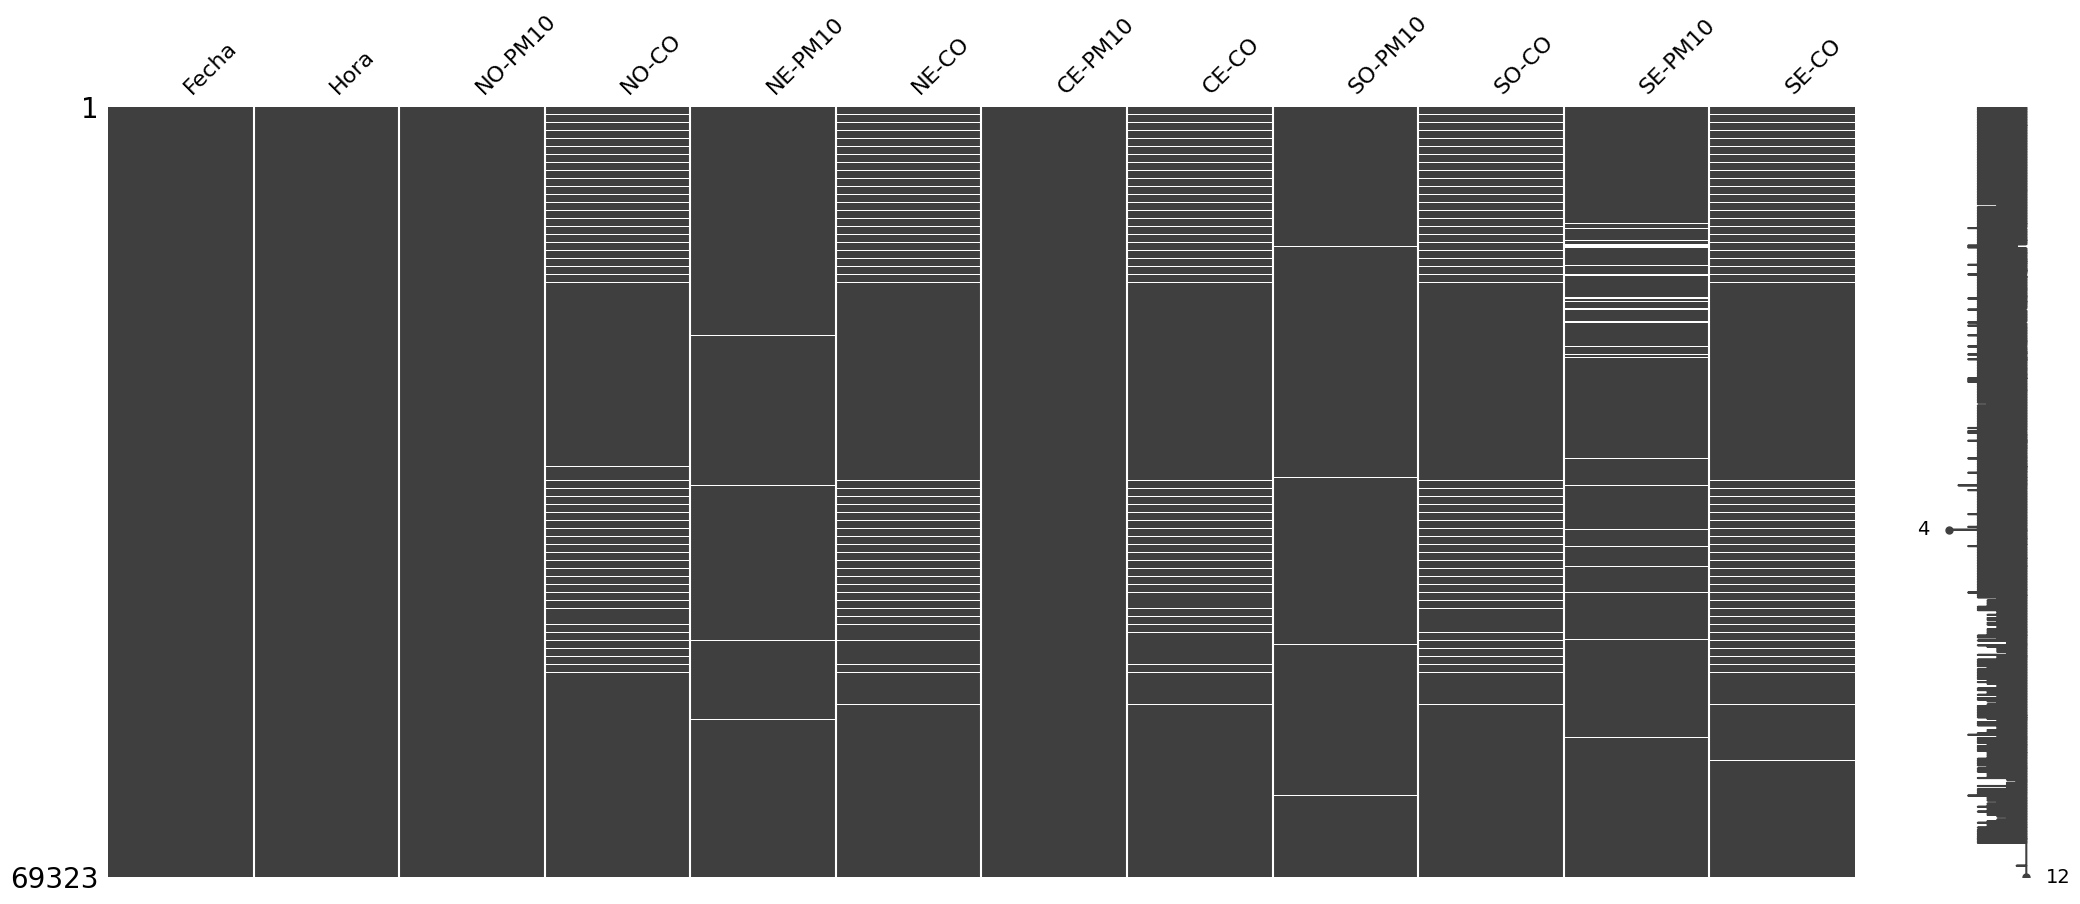

In [24]:
#Con la librería de arriba ahora checo la distribución de los datos nulos
msno.matrix(df)

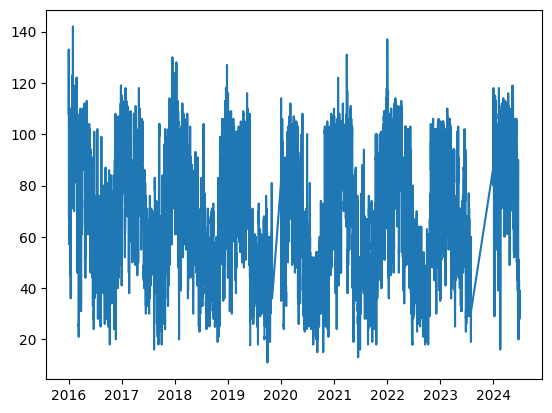

In [25]:
plt.plot(df.index,df['NO-PM10' ]) #Se observa que no hay datos en un intervalo de 2023-2024, por ello hay que ver si hay datos nulos y eso lo hacemos como arri

In [26]:
#Para ver los gráficos más bonitos nos pasaron un código por zoom
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    plt.figure(figsize=(15, 5))
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    for zone in zones:
        column = f"{zone}-{variable}"
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
        else:
            print(f"Columna {column} no encontrada en el DataFrame")
    plt.xlabel('Fecha_Hora')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

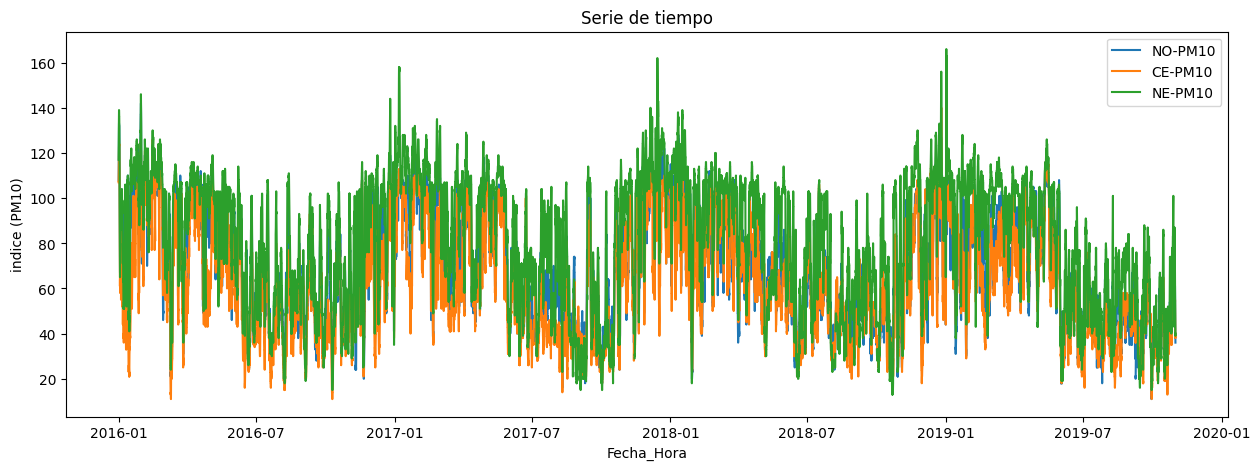

In [27]:
plot_time_series(df,'PM10', ['NO' , 'CE', 'NE'], 'indice (PM10)', 'Serie de tiempo', start_date='2016-01-01', end_date='2019-12-30')